In [9]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats
import pickle
import math

import etroc1_array

In [10]:

# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P0_QInj=1M25/'  # Pixle=0
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P1_QInj=1M25/'   # Pixel=1
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P2_QInj=1M25/'   # Pixel=2
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P3_QInj=1M25/'   # Pixel=3
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P4_QInj=1M25/'   # Pixel=4
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P5_QInj=1M25/'   # Pixel=5
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P6_QInj=1M25/'   # Pixel=6
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P7_QInj=1M25/'   # Pixel=7
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P8_QInj=1M25/'   # Pixel=8
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P9_QInj=1M25/'   # Pixel=9
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P10_QInj=1M25/'   # Pixel=10
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P11_QInj=1M25/'   # Pixel=11
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P12_QInj=1M25/'   # Pixel=12
path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P13_QInj=1M25/'   # Pixel=13
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P14_QInj=1M25/'   # Pixel=14
# path = './data/Q_DAC_Scan_1M25/Jitter_Performance_P15_QInj=1M25/'   # Pixel=15

##### data for reproducibility check ##########
# path = './data/Q_DAC_Scan_1M25_check/Jitter_Performance_P2_QInj=1M25_V1/'  # Pixel = 2
# path = './data/Q_DAC_Scan_1M25_check/Jitter_Performance_P5_QInj=1M25_V1/'  # Pixel = 5
# path = './data/Q_DAC_Scan_1M25_check/Jitter_Performance_P11_QInj=1M25_V1/'  # Pixel = 11

file_in = 'Array_T_Pixel=0_DAC_P0=450_QSel=4_CLSel=0_RfSel=2_IBSel=7_PhaseAdj=090_B1_200000_07-23_16-11-02.dat'


pixel_index=path.split('_')[5]



file_list = os.listdir(path)
file_in = [item for item in file_list if item.split('.')[1]=='dat']

# f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[0], 'r')
# lines = f_r.readlines()
# f_r.close()

# print(datapath)

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
qinj_base = 32       ##  1.25 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)

# print(file_in)
file_in_4fC=[item for item in file_in if item.split('=')[3]=='4_CLSel']
file_in_5fC=[item for item in file_in if item.split('=')[3]=='5_CLSel']
file_in_6fC=[item for item in file_in if item.split('=')[3]=='6_CLSel']
file_in_8fC=[item for item in file_in if item.split('=')[3]=='8_CLSel']
file_in_10fC=[item for item in file_in if item.split('=')[3]=='10_CLSel']
file_in_15fC=[item for item in file_in if item.split('=')[3]=='15_CLSel']
file_in_20fC=[item for item in file_in if item.split('=')[3]=='20_CLSel']

file_in_allQ=[]
file_in_allQ.append(file_in_4fC)
file_in_allQ.append(file_in_5fC)
file_in_allQ.append(file_in_6fC)
file_in_allQ.append(file_in_8fC)
file_in_allQ.append(file_in_10fC)
file_in_allQ.append(file_in_15fC)
file_in_allQ.append(file_in_20fC)

# print(file_in_4fC)

toa_allQ_list = []
toa_mu_allQ_list = []
toa_std_allQ_list = []
tot_allQ_list = []
tot_mu_allQ_list = []
tot_std_allQ_list = []
cal_allQ_list = []
cal_mu_allQ_list = []
cal_std_allQ_list = []
hitposition_allQ_list = []
hitposition_mod_allQ_list = []
phase_allQ_list=[]
events_allQ_list = []
DAC_allQ_list = []
hits_allQ_list = []

raw_data_processing = False

if raw_data_processing == True:
    for item_allQ in tqdm(file_in_allQ):
    
        toa_list = []
        toa_mu_list = []
        toa_std_list = []
        tot_list = []
        tot_mu_list = []
        tot_std_list = []
        cal_list = []
        cal_mu_list = []
        cal_std_list = []
        hitposition_list = []
        hitposition_mod_list = []
        phase_list=[]
        events_list = []
        DAC_list = []
        hits_list = []
        i=0
    #     print(item_allQ)
        for item in tqdm(item_allQ):
    #         print('item[i] is',item)
            f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ item, 'r')
            lines = f_r.readlines()
            f_r.close()
            
            num_lines = len(lines)
            toa = []
            tot = []
            cal = []
            hitposition = []
            hitposition_mod = []
            events = 0
            for m in range (0, num_lines):
                line_item = lines[m]
                if line_item.split()[3] == '1':
                    toa += [int(line_item.split()[0])]
                    tot += [int(line_item.split()[1])]
                    cal += [int(line_item.split()[2])]
                    hitposition += [m]
                    hitposition_mod += [m%qinj_base]
                    events = events + 1
            
            
            toa_mu = np.mean(toa)
            toa_std = np.std(toa)
            tot_mu = np.mean(tot)
            tot_std = np.std(tot)
            cal_mu = np.mean(cal)
            cal_std = np.std(cal)
            
            PhaseAdj = int(item.split("=")[7].split('_')[0])
            DAC_setting = int(item.split("=")[2].split('_')[0])
            
            hit_number = len(toa)
            
            toa_list.append(toa)
            toa_mu_list.append(toa_mu)
            toa_std_list.append(toa_std)
            tot_list.append(tot)
            tot_mu_list.append(tot_mu)
            tot_std_list.append(tot_std)
            cal_list.append(cal)
            cal_mu_list.append(cal_mu)
            cal_std_list.append(cal_std)
            hitposition_list.append(hitposition)
            hitposition_mod_list.append(hitposition_mod)
            phase_list.append(PhaseAdj)
            events_list.append(events)
            DAC_list.append(DAC_setting)
            hits_list.append(hit_number)
            
            i += 1
            
        toa_allQ_list.append(toa_list)
        toa_mu_allQ_list.append(toa_mu_list)
        toa_std_allQ_list.append(toa_std_list)
        tot_allQ_list.append(tot_list)
        tot_mu_allQ_list.append(tot_mu_list)
        tot_std_allQ_list.append(tot_std_list)
        cal_allQ_list.append(cal_list)
        cal_mu_allQ_list.append(cal_mu_list)
        cal_std_allQ_list.append(cal_std_list)
        hitposition_allQ_list.append(hitposition_list)
        hitposition_mod_allQ_list.append(hitposition_mod_list)
        events_allQ_list.append(events_list)
        DAC_allQ_list.append(DAC_list)
        hits_allQ_list.append(hits_list)   
        
    num_bin = None
    
    # print(phase_list)
    
    with open(path+'toa_file.list', 'wb') as f:
        pickle.dump(toa_allQ_list, f)
    
    with open(path+'toa_mu_file.list', 'wb') as f:
        pickle.dump(toa_mu_allQ_list, f)
        
    with open(path+'toa_std_file.list', 'wb') as f:
        pickle.dump(toa_std_allQ_list, f)
    
    with open(path+'tot_file.list', 'wb') as f:
        pickle.dump(tot_allQ_list, f)
    
    with open(path+'tot_mu_file.list', 'wb') as f:
        pickle.dump(tot_mu_allQ_list, f)
        
    with open(path+'tot_std_file.list', 'wb') as f:
        pickle.dump(tot_std_allQ_list, f)
    
    with open(path+'cal_file.list', 'wb') as f:
        pickle.dump(cal_allQ_list, f)
    
    with open(path+'cal_mu_file.list', 'wb') as f:
        pickle.dump(cal_mu_allQ_list, f)
        
    with open(path+'cal_std_file.list', 'wb') as f:
        pickle.dump(cal_std_allQ_list, f)
    
    with open(path+'hitposition_file.list', 'wb') as f:
        pickle.dump(hitposition_allQ_list, f)
        
    with open(path+'hitposition_mod_file.list', 'wb') as f:
        pickle.dump(hitposition_mod_allQ_list, f)
    
    
    with open(path+'DAC_file.list', 'wb') as f:
        pickle.dump(DAC_allQ_list, f)
    
    with open(path+'hits_file.list', 'wb') as f:
        pickle.dump(hits_allQ_list, f)
    
        
    # with open(path+'toa_mu_file.list', 'rb') as f:
    #     my_list = pickle.load(f)
    # print(my_list)



In [11]:
######### read data of Pixel 0 back from files ###########


folders = os.listdir(path)
# print(folders)

def myFunc(e):
  return len(e)

# folders.sort(key=myFunc)
# print(folders)

# print(folders[0].split('_')[2])

toa_rb_list=[]
toa_mu_rb_list=[]
toa_std_rb_list = []
tot_rb_list=[]
tot_mu_rb_list=[]
tot_std_rb_list = []
cal_rb_list=[]
cal_mu_rb_list=[]
cal_std_rb_list = []
hitposition_mod_rb_list = []
phase_rb_list = []
DAC_rb_list = []
hits_rb_list = []


with open(path+'/'+'toa_file.list', 'rb') as f:
    toa_rb_list.append(pickle.load(f))
with open(path+'/'+'toa_mu_file.list', 'rb') as f:
    toa_mu_rb_list.append(pickle.load(f))
with open(path+'/'+'toa_std_file.list', 'rb') as f:
    toa_std_rb_list.append(pickle.load(f))
with open(path+'/'+'tot_file.list', 'rb') as f:
    tot_rb_list.append(pickle.load(f))
with open(path+'/'+'tot_mu_file.list', 'rb') as f:
    tot_mu_rb_list.append(pickle.load(f))
with open(path+'/'+'tot_std_file.list', 'rb') as f:
    tot_std_rb_list.append(pickle.load(f))
with open(path+'/'+'cal_file.list', 'rb') as f:
    cal_rb_list.append(pickle.load(f))    
with open(path+'/'+'cal_mu_file.list', 'rb') as f:
    cal_mu_rb_list.append(pickle.load(f))
with open(path+'/'+'cal_std_file.list', 'rb') as f:
    cal_std_rb_list.append(pickle.load(f))
with open(path+'/'+'hitposition_mod_file.list', 'rb') as f:
    hitposition_mod_rb_list.append(pickle.load(f))
# with open(path+'/'+'phase_file.list', 'rb') as f:
#     phase_rb_list.append(pickle.load(f))
with open(path+'/'+'DAC_file.list', 'rb') as f:
    DAC_rb_list.append(pickle.load(f))
with open(path+'/'+'hits_file.list', 'rb') as f:
    hits_rb_list.append(pickle.load(f))
# print(len(hits_rb_list[0][0]))
# print(toa_mu_rb_list)
print(len(cal_rb_list))

1


In [12]:
dac_num = len(hits_rb_list[0][0])
print(dac_num)
# print('hits:',hits_rb_list)
######## find out the start point and transition point  ############
Qinj = ['4 fC', '5 fC', '6 fC', '8 fC', '10 fC', '15 fC', '20 fC']
Qinj_fC = [4,5,6,8,10,15,20]

DAC_P0_start_list = []
DAC_P0_transition_list = []
item_num = 0
for h in range(0,len(Qinj)):
    dac_transition = 0
    dac_num = len(hits_rb_list[0][h])
    if hits_rb_list[0][h][dac_num-1] == 0:
        s_curve_found = 0
        for i in range(0,dac_num):
            if hits_rb_list[0][h][dac_num-1-i] > 0 and s_curve_found==0:
                dac_transition = dac_num-1-i - 1
                s_curve_found = 1
            if hits_rb_list[0][h][dac_num-1-i] > 6250 and s_curve_found==1:
                dac_start = dac_num-1-i+1
                break
            else:
                dac_start = dac_transition - 50
        if s_curve_found == 1:
            DAC_P0_start_list.append(dac_start)
            DAC_P0_transition_list.append(dac_transition)
        item_num += 1


print('transition points are',DAC_P0_transition_list)
print('starting points are',DAC_P0_start_list)

index_2fC=2*DAC_P0_transition_list[0] - DAC_P0_transition_list[2]
print('index_2fC=',index_2fC)

################### find out TOA bin size ##########################
calCode = []
for m in range(0,len(Qinj)):
    calCode = calCode + [cal_mu_rb_list[0][m][index_2fC]]
#     print(cal_mu_rb_list[0][m][index])
print('calCode is',calCode)
calCode_mu=np.mean(calCode)
print('calCode mean is', calCode_mu)
toa_bin = 3125/calCode_mu
print('toa_bin is',toa_bin)

################### find out jitter at 2 fC TH########################
toa_jitter_code = []
tot_jitter_code = []
toa_jitter_ps = []
tot_jitter_ps = []

for m in range(0,len(Qinj_fC)):
    toa_jitter_code += [toa_std_rb_list[0][m][index_2fC]]
    tot_jitter_code += [tot_std_rb_list[0][m][index_2fC]]
    toa_jitter_ps += [toa_std_rb_list[0][m][index_2fC]*toa_bin]
    tot_jitter_ps += [(tot_std_rb_list[0][m][index_2fC]*2-math.floor(tot_std_rb_list[0][m][index_2fC]))*toa_bin]

print('toa jitter in code is',toa_jitter_code)
print('tot jitter in code is',tot_jitter_code)
print('toa jitter in ps is',toa_jitter_ps)
print('tot jitter in ps is',tot_jitter_ps)

90
transition points are [20, 23, 26, 36, 43, 63, 83]
starting points are [8, 8, 8, 9, 8, 8, 8]
index_2fC= 14
calCode is [173.41456, 173.3632, 173.28304, 173.12256, 173.12416, 173.14112, 173.24976]
calCode mean is 173.24262857142858
toa_bin is 18.038285529196706
toa jitter in code is [0.6914129301654691, 0.6341452199614849, 0.5635946117556483, 0.3155602408415864, 0.29421076526871, 0.45384856681496744, 0.49936961221123577]
tot jitter in code is [0.6159016856609503, 0.47928963435484395, 0.46997194129011577, 0.32035776001214644, 0.27111026243947317, 0.5098257835770961, 0.27521599953491077]
toa jitter in ps is [12.471903852903274, 11.438892544640515, 10.166280529565146, 5.6921657259626155, 5.30705778968046, 8.186650035225092, 9.007771649670506]
tot jitter in ps is [22.219620927731555, 17.291126551353923, 16.954976135403957, 11.557409493185945, 9.780728647557341, 18.392766108620208, 9.928849563627976]


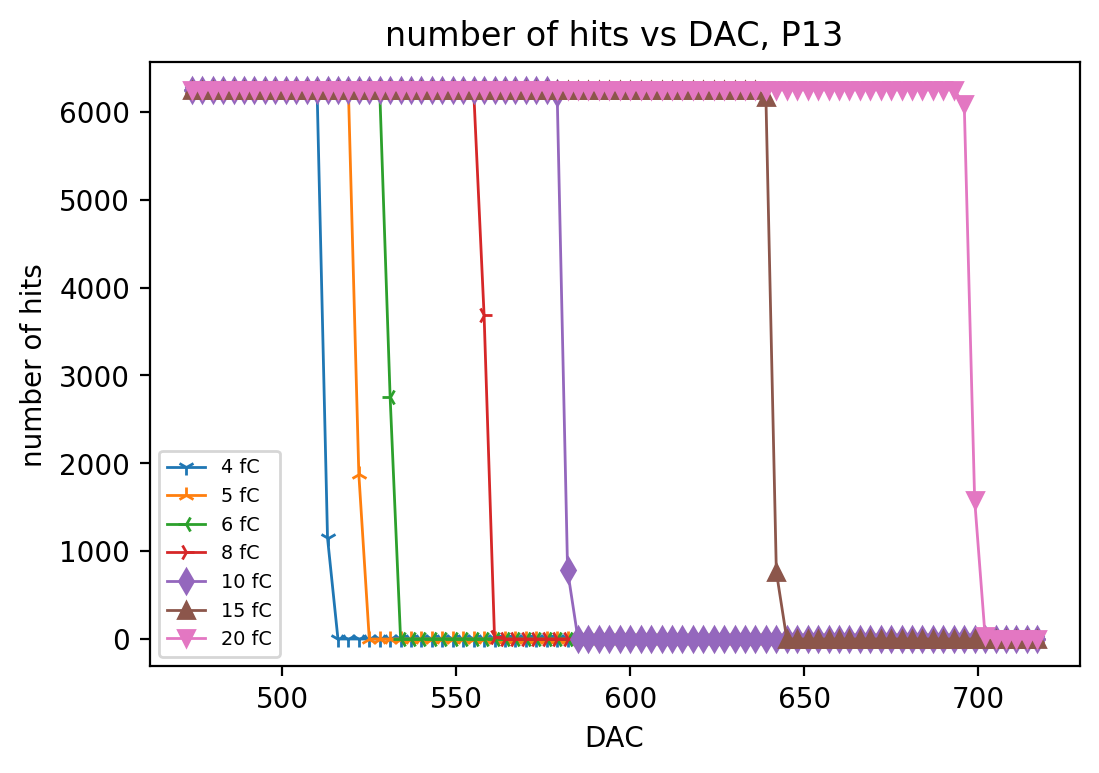

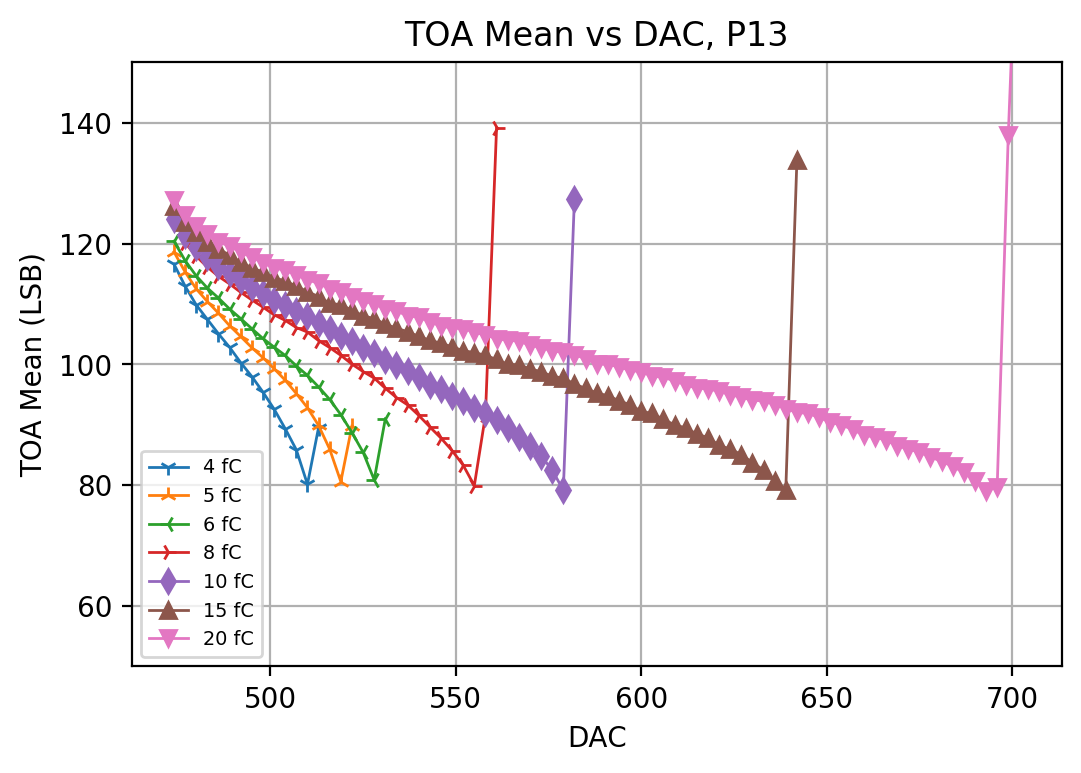

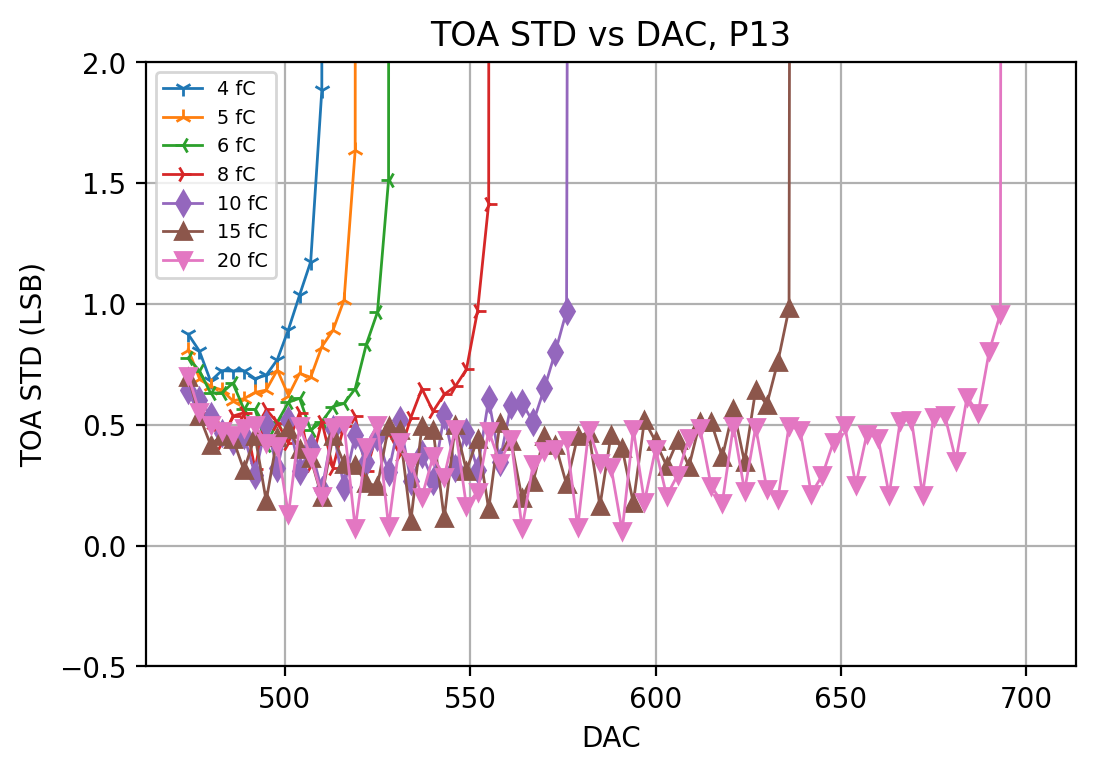

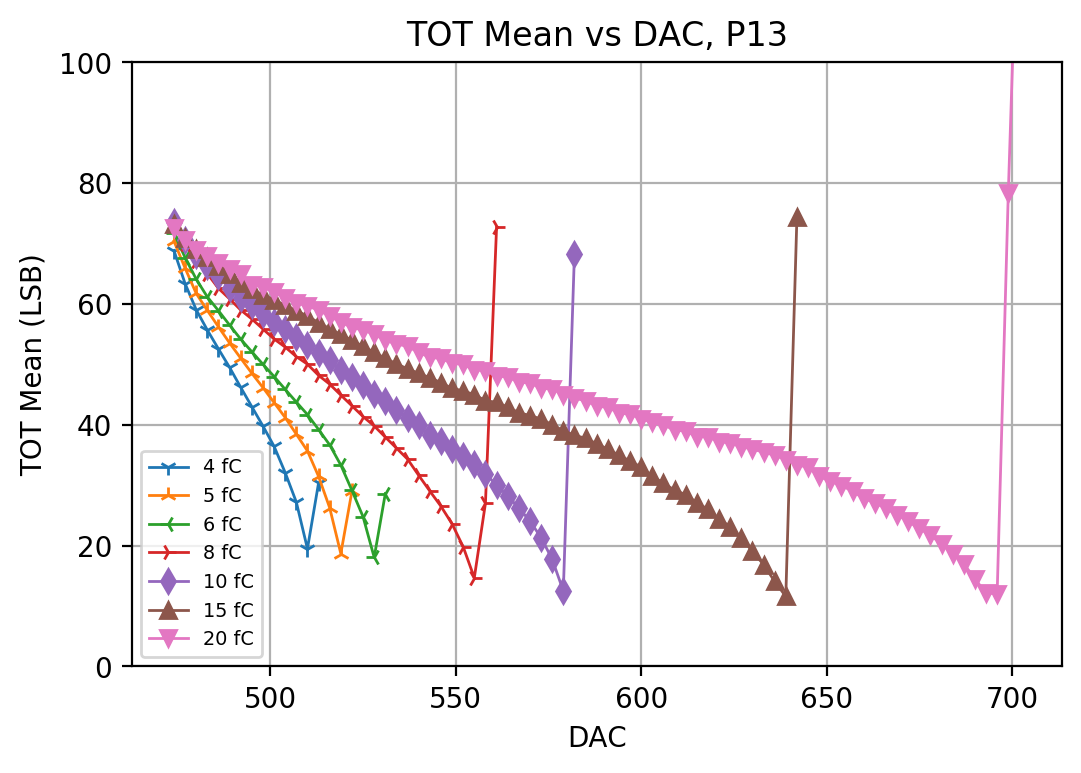

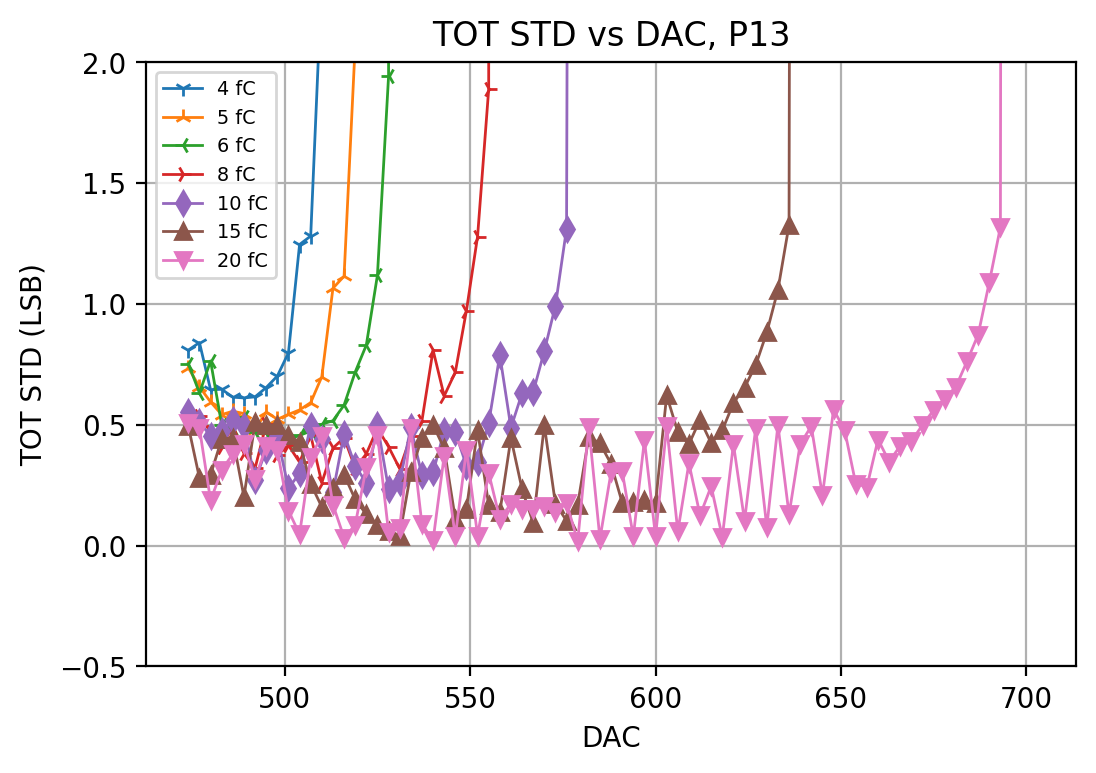

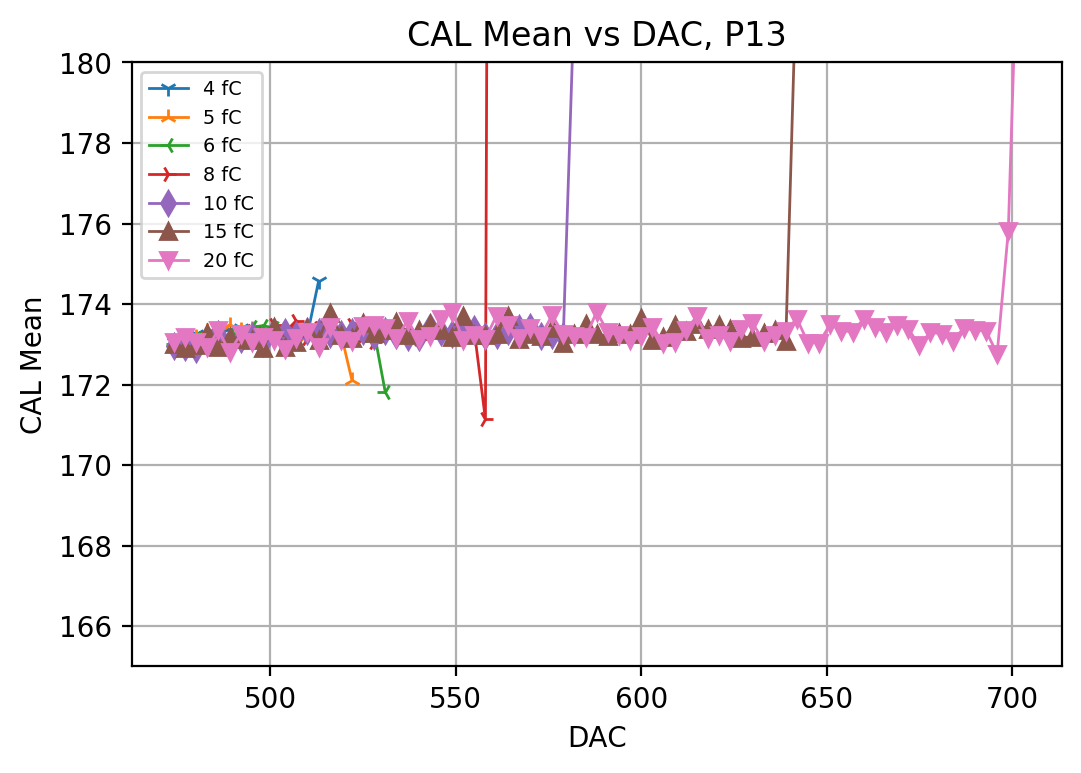

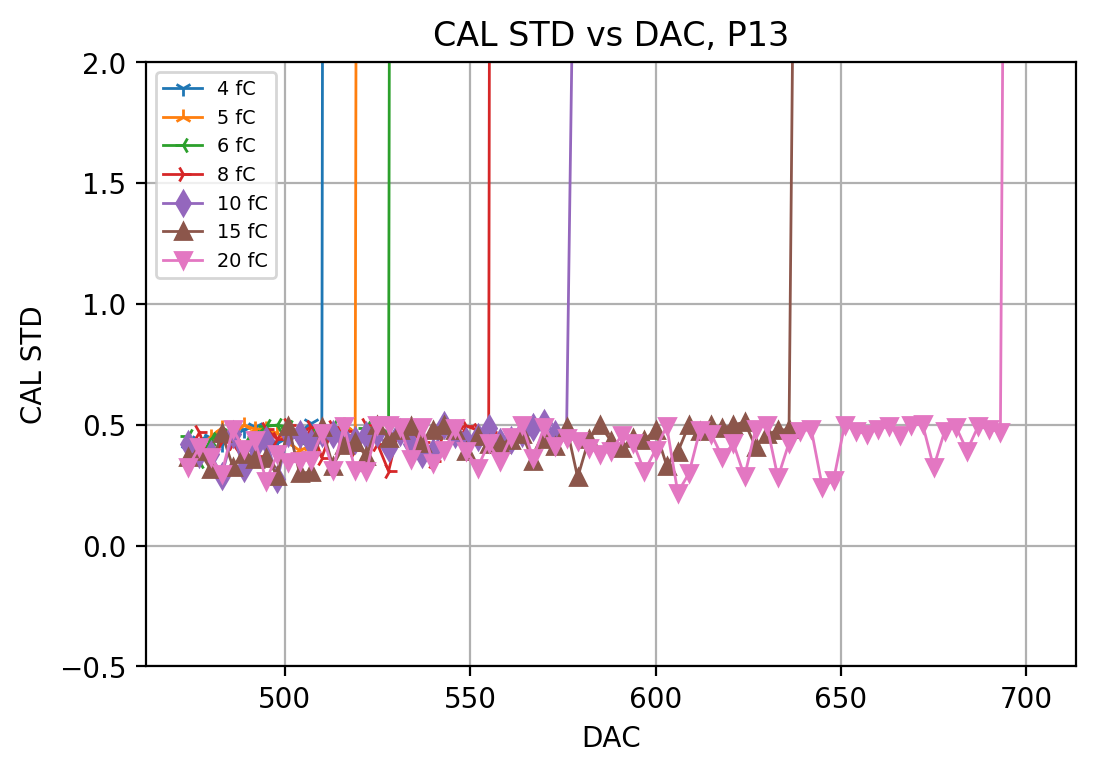

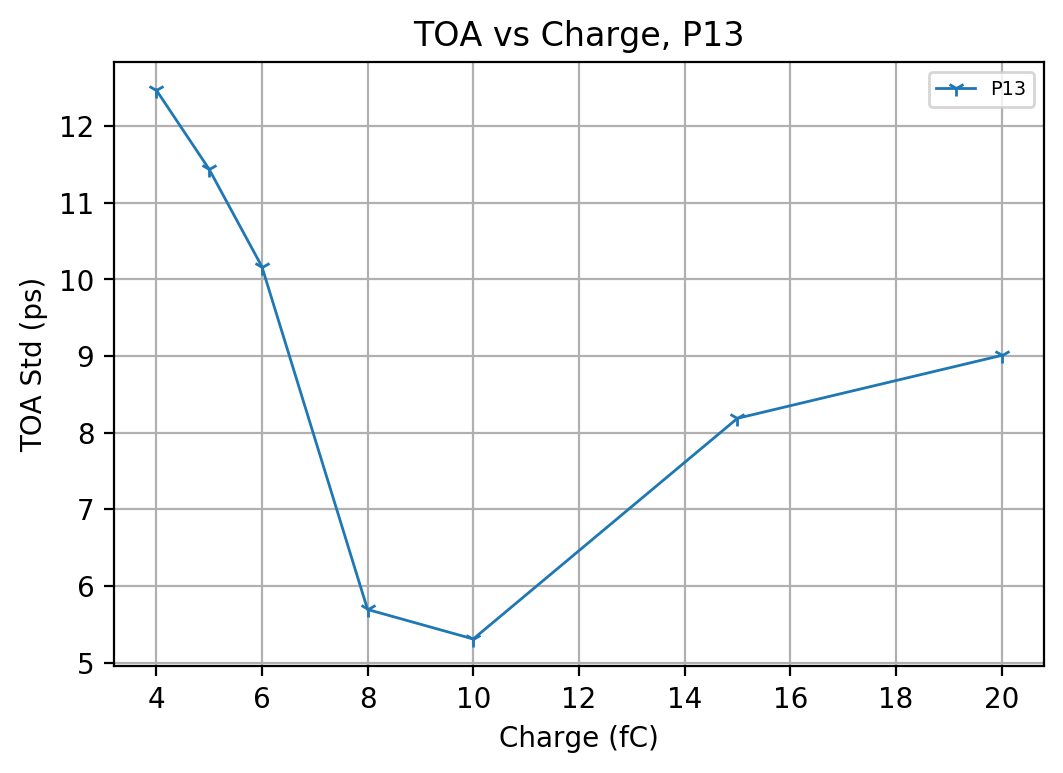

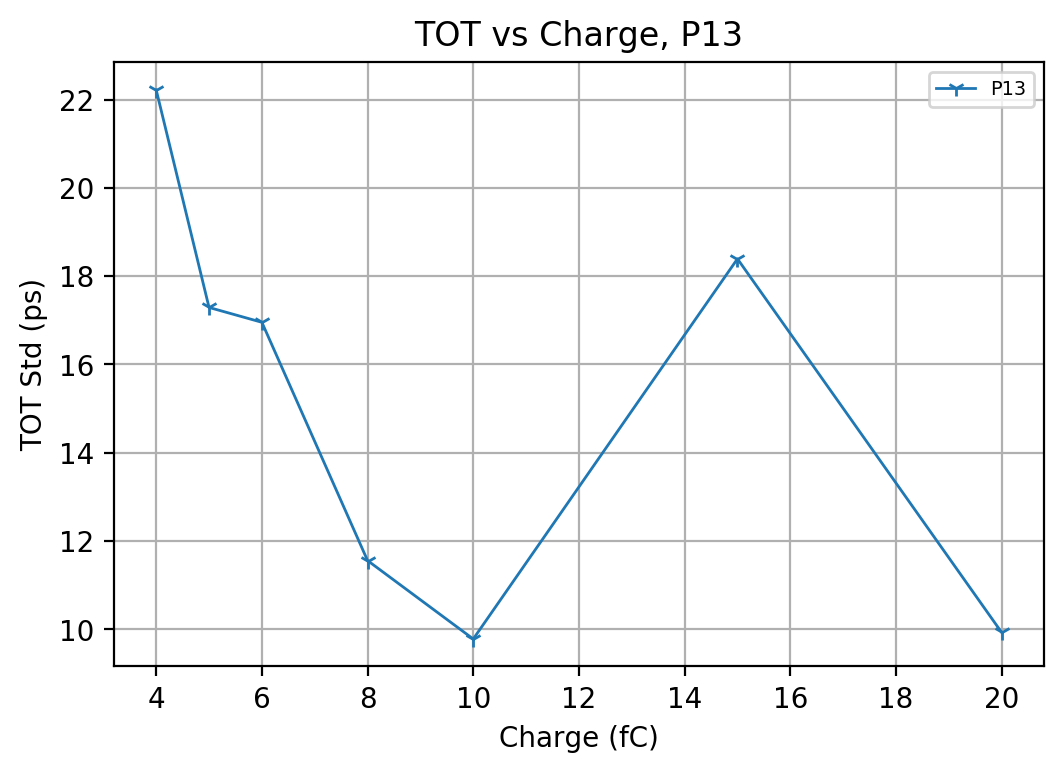

In [17]:
# plt.style.use('science')
import itertools
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
# pp = PdfPages(path+"plots_QDAC_scan_P0"+".pdf")
pp = PdfPages(path+'plots_QDAC_scan_'+pixel_index+".pdf")

# marker=['.-','o-','x-','']

#######################  plot  ############################################
######### Plot hits vs DAC  ##############



left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],hits_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
# ax1.grid()
ax1.set(xlabel='DAC', ylabel='number of hits',
       title='number of hits vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



######### Plot toa vs DAC  ##############

left_limit = 450
right_limit = 150
bottom_limit = 50
top_limit = 150

fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],toa_mu_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-', linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA Mean (LSB)',
       title='TOA Mean vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],toa_std_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-', linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-0.5,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA STD (LSB)',
       title='TOA STD vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)



######### Plot tot vs DAC  ##############

left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],tot_mu_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=0,top=100)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT Mean (LSB)',
       title='TOT Mean vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],tot_std_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-0.5,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOT STD (LSB)',
       title='TOT STD vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot cal vs DAC  ##############

left_limit = 450
right_limit = 600
bottom_limit = -100
top_limit = 7000

fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],cal_mu_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=165,top=180)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='CAL Mean',
       title='CAL Mean vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
for i in range(0,len(Qinj)):
    ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],cal_std_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-0.5,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='CAL STD',
       title='CAL STD vs DAC, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

######### Plot toa and std vs QInj  ##############
fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
ax1.plot(Qinj_fC,toa_jitter_ps,
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=-0.5,top=2)
ax1.grid()
ax1.set(xlabel='Charge (fC)', ylabel='TOA Std (ps)',
       title='TOA vs Charge, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)

fig, ax1 = plt.subplots(dpi=200)
marker = itertools.cycle(('1', '2', '3', '4', 'd','^','v','*','x','s','p'))
ax1.plot(Qinj_fC,tot_jitter_ps,
             marker = next(marker), linestyle='-',linewidth=1, label=pixel_index )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=-0.5,top=2)
ax1.grid()
ax1.set(xlabel='Charge (fC)', ylabel='TOT Std (ps)',
       title='TOT vs Charge, '+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
pp.savefig(fig)
plt.close(fig)


pp.close()

In [14]:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)

x = thisdict["model"]
x = thisdict.get("model")
print('x is',x)

thisdict["year"] = [2018,2019,2020]

print(thisdict)

for x in thisdict:
  print(x)

for x, y in thisdict.items():
  print(x, y)

with open(path+'test.dict', 'wb') as f:
    pickle.dump(thisdict, f)

with open(path+'test.dict', 'rb') as f:
        test_dict=pickle.load(f)
        
for x, y in test_dict.items():
  print(x, y)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
x is Mustang
{'brand': 'Ford', 'model': 'Mustang', 'year': [2018, 2019, 2020]}
brand
model
year
brand Ford
model Mustang
year [2018, 2019, 2020]
brand Ford
model Mustang
year [2018, 2019, 2020]


cal is [173.03984, 173.0984, 173.15616, 173.18976, 172.95648, 173.12256, 173.32064, 173.26272, 173.46896, 173.30544, 173.59088, 173.15376, 173.40288, 173.34752, 173.1928, 173.47376, 173.23136, 173.06144, 173.44144, 173.35136, 173.23936, 173.12064, 173.31872, 173.39136, 173.24224, 173.20368, 173.32576, 171.1351058057515, 248.05263157894737, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


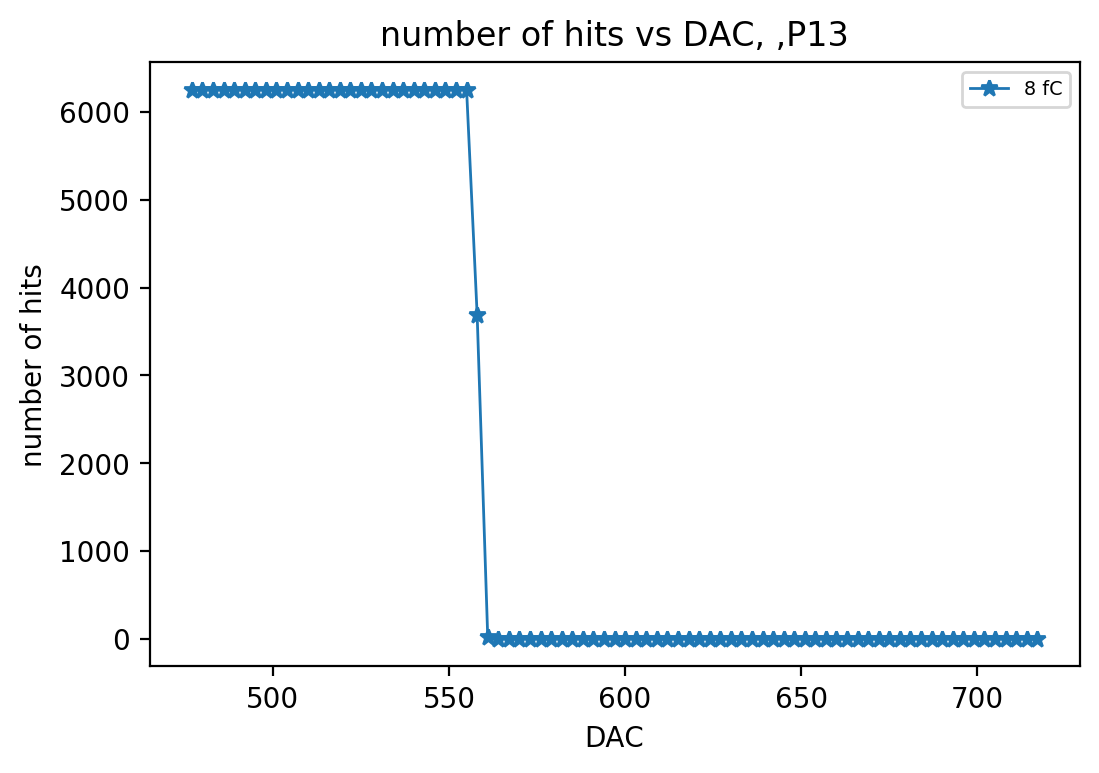

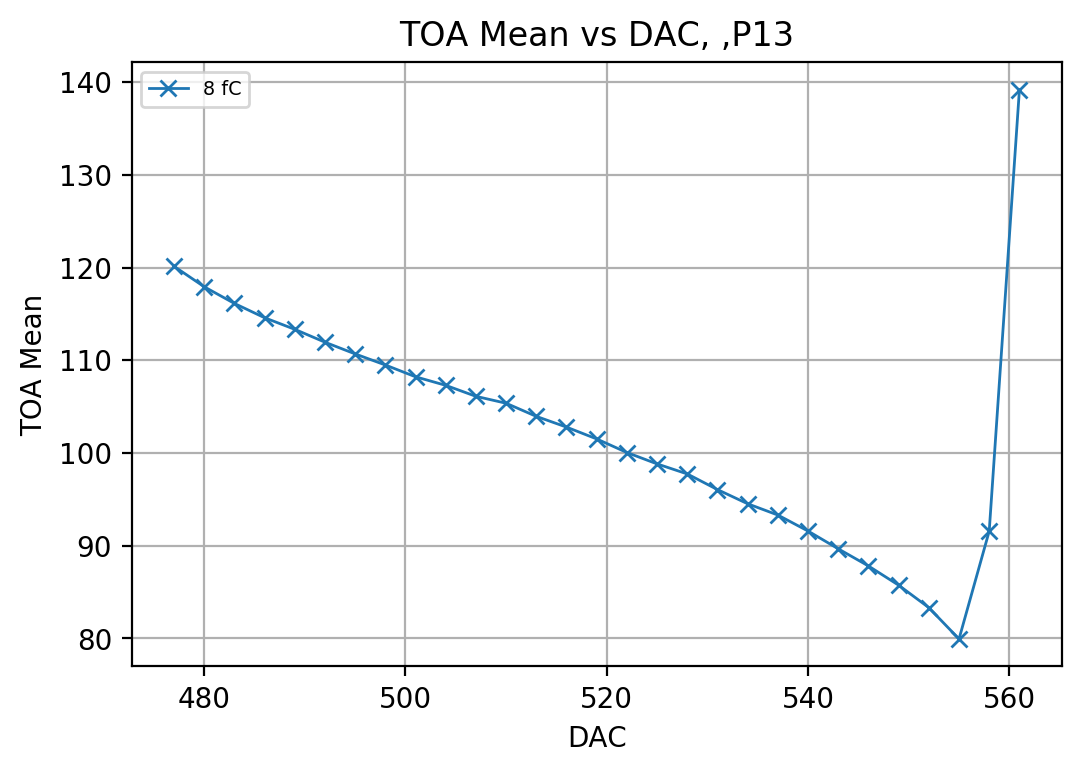

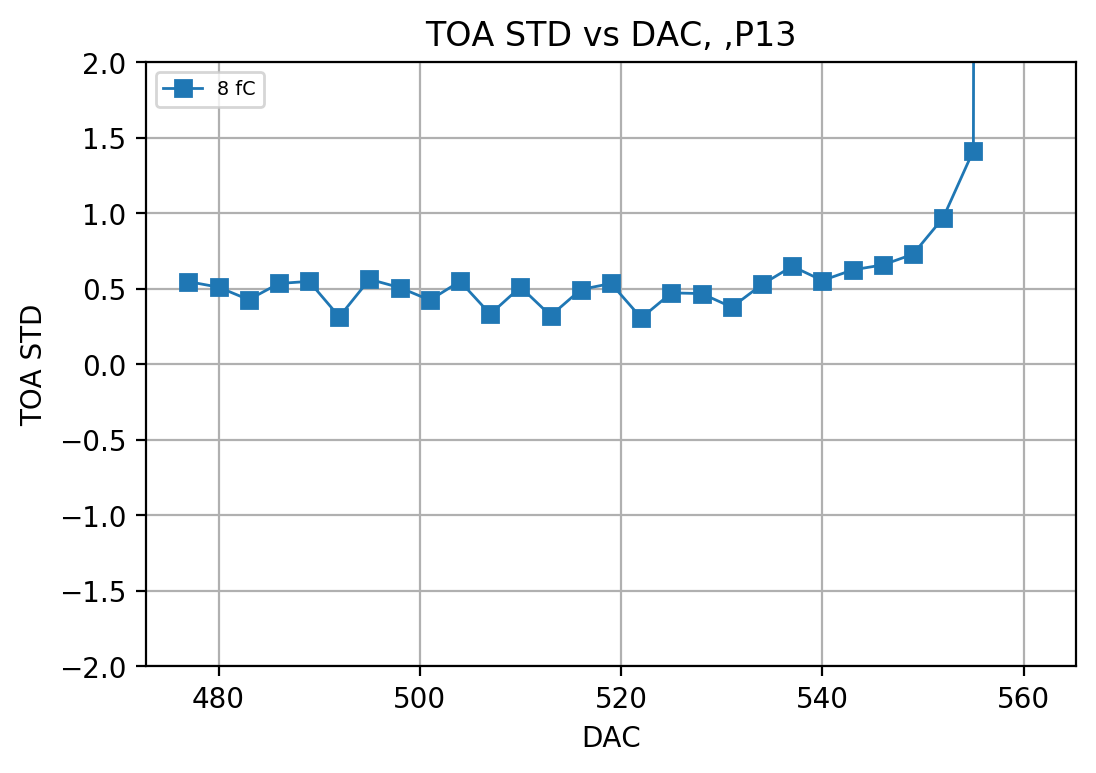

In [15]:

i=3
print('cal is',cal_mu_rb_list[0][i][DAC_P0_start_list[i]:])

fig, ax1 = plt.subplots(dpi=200)
ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],hits_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-',linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
# ax1.grid()
ax1.set(xlabel='DAC', ylabel='number of hits',
       title='number of hits vs DAC,'+' ,'+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],toa_mu_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-', linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.set_ylim(bottom=bottom_limit,top=top_limit)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA Mean',
       title='TOA Mean vs DAC,'+' ,'+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
plt.close(fig)


fig, ax1 = plt.subplots(dpi=200)

ax1.plot(DAC_rb_list[0][i][DAC_P0_start_list[i]:],toa_std_rb_list[0][i][DAC_P0_start_list[i]:],
             marker = next(marker), linestyle='-', linewidth=1, label=Qinj[i] )
# i=15
# ax1.plot(DAC_10fC_list[i], hits_10fC_list[i], linewidth=1, label=pixel_index_list[i] )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=-2,top=2)
ax1.grid()
ax1.set(xlabel='DAC', ylabel='TOA STD',
       title='TOA STD vs DAC,'+' ,'+ pixel_index)
ax1.legend(loc='best', fontsize = 'x-small')
plt.show()
plt.close(fig)

[4 6]
1532.3523557052602
2345.8790330720317


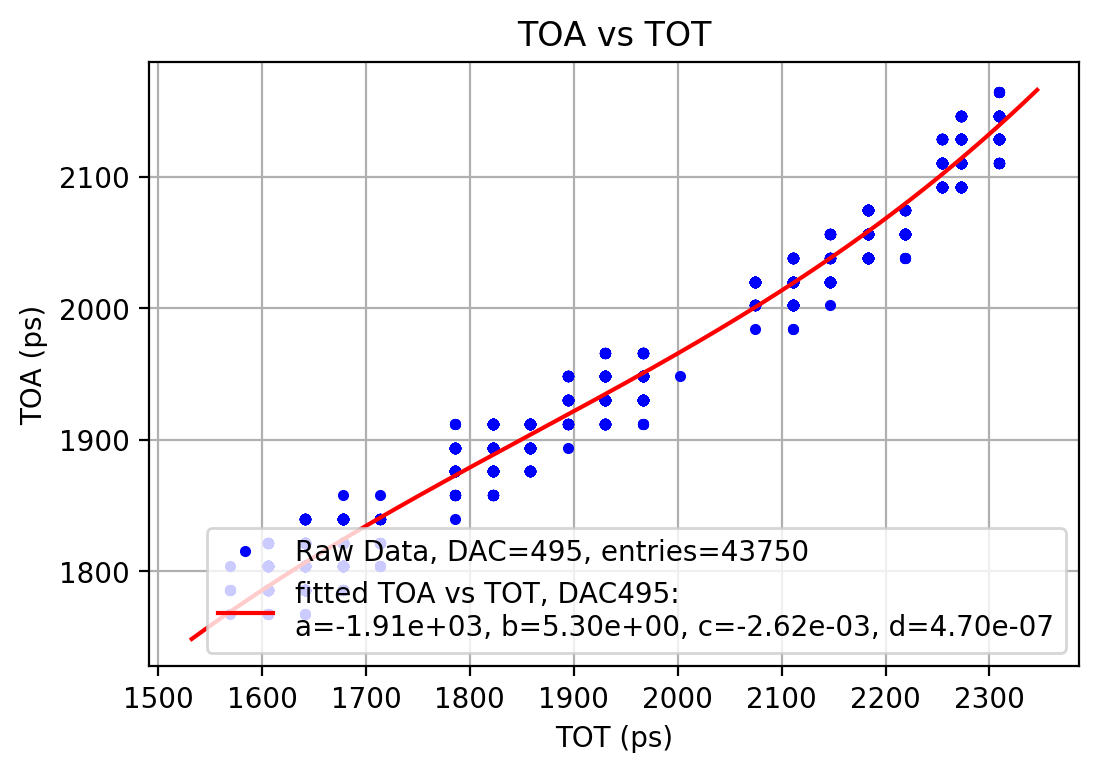

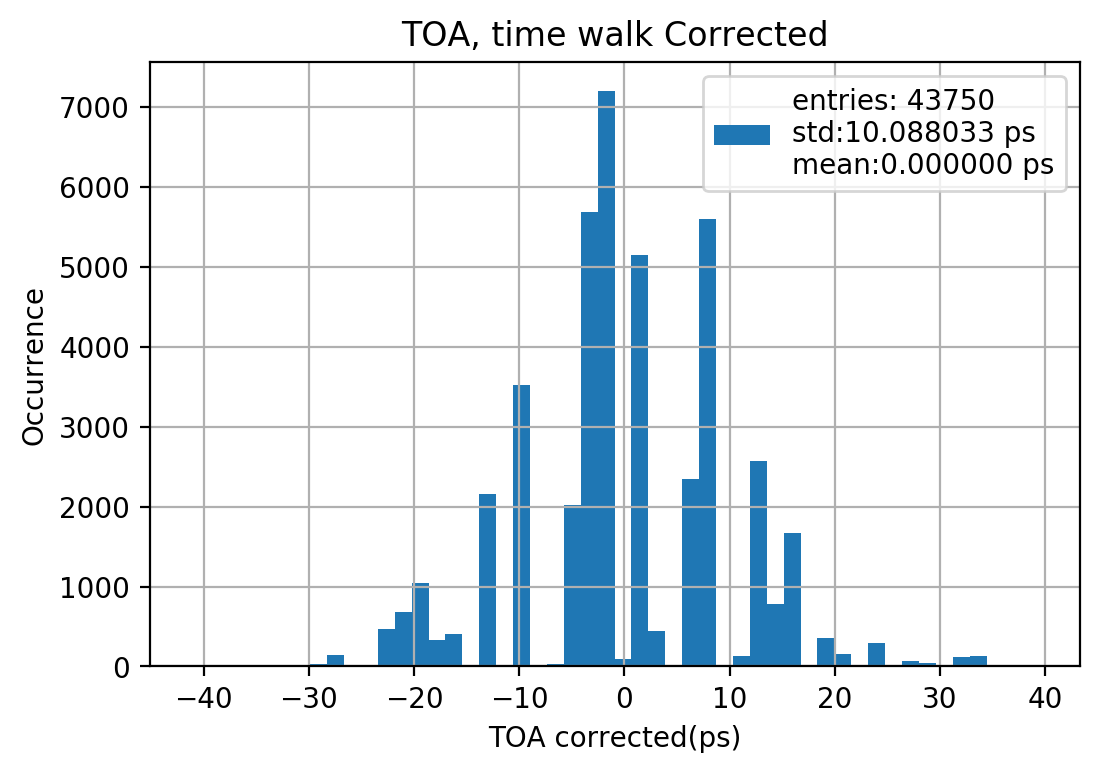

1532.3523557052602
2345.8790330720317


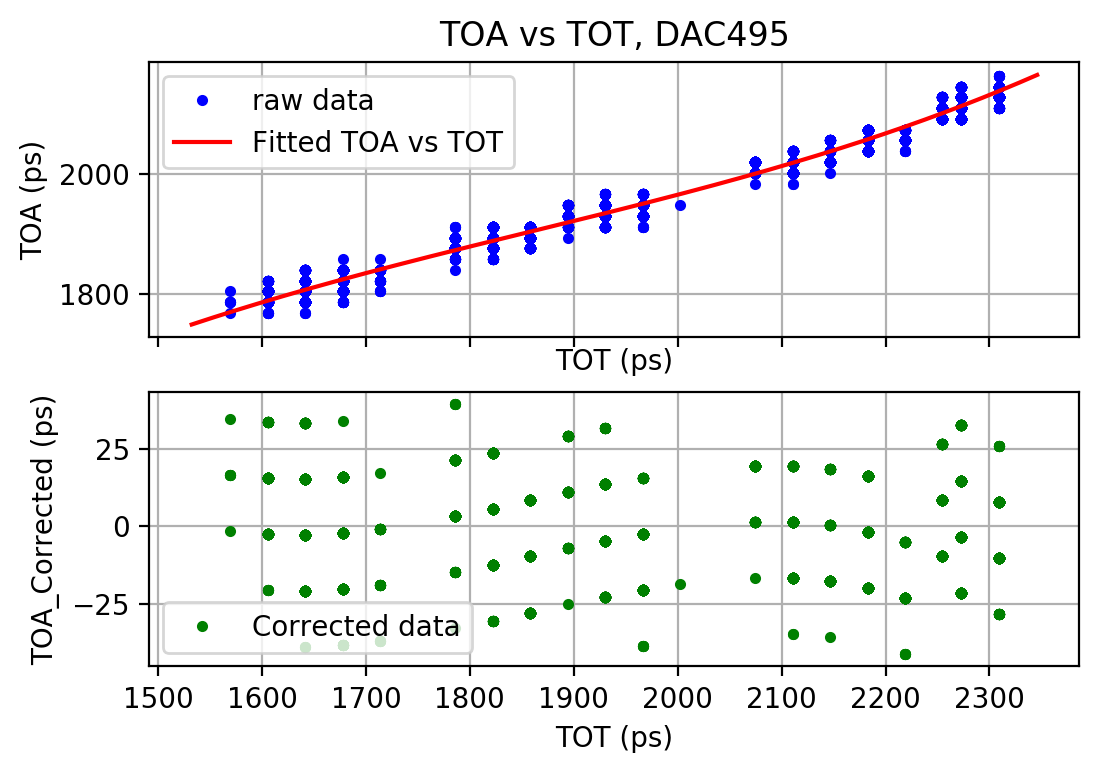

In [16]:
# print((DAC_rb_list[0][0][DAC_rb_list[0][0].index(495)]))
# index=DAC_rb_list[0][0].index(495)
# print(toa_rb_list[0][0][index])
# print((len(toa_rb_list[0])))
# print((len(tot_rb_list[0][0][index])))
a=[1,2]
b=[3,4]
a=np.array(a)
b=np.array(b)
c=a+b
print(c)




pp = PdfPages(path+'plots_QDAC_scan_timewalkcorrection_'+pixel_index+".pdf")
########################## Time walk correction  ############################
polynomial_4th = True
LindseyFit = False
SciFit = False
######  merge toa and tot from different Q  ######
toa_merged = toa_rb_list[0][0][index_2fC] + toa_rb_list[0][1][index_2fC] + toa_rb_list[0][2][index_2fC] + \
            toa_rb_list[0][3][index_2fC] + toa_rb_list[0][4][index_2fC] + toa_rb_list[0][5][index_2fC] + \
            toa_rb_list[0][6][index_2fC]
tot_merged = tot_rb_list[0][0][index_2fC] + tot_rb_list[0][1][index_2fC] + tot_rb_list[0][2][index_2fC] + \
            tot_rb_list[0][3][index_2fC] + tot_rb_list[0][4][index_2fC] + tot_rb_list[0][5][index_2fC] + \
            tot_rb_list[0][6][index_2fC]

# print(len(toa_merged))
# print(len(tot_merged))

toa_code_merged_np = np.array(toa_merged)    # converting to np.array to facilitate processing
tot_code_merged_np = np.array(tot_merged)    # converting to np.array to facilitate processing
length_tot_toa = len(toa_code_merged_np)

toa_merged_np = toa_code_merged_np * toa_bin
tot_offset = [math.floor(item/32) for item in tot_code_merged_np]
tot_merged_np = (tot_code_merged_np*2 - tot_offset) * toa_bin

######  fitting   ######
if polynomial_4th == True:
    popt_toa, pcov_toa = curve_fit(etroc1_array.func1, tot_merged_np, toa_merged_np)
else:
    popt_toa, pcov_toa = curve_fit(etroc1_array.func0, tot_merged_np, toa_merged_np)

######  plot fitting   ######
fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_merged_np, toa_merged_np, 'b.', label='Raw Data, DAC=495, entries=%d'%(length_tot_toa))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc1_array.func1(xtot, *popt_toa), 'r-', 
         label='fitted TOA vs TOT, DAC495: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa))
else:
    ax1.plot(xtot, etroc1_array.func0(xtot, *popt_toa), 'r-', 
         label='fitted TOA vs TOT, DAC495: \na=%5.2e, b=%5.2e' % tuple(popt_toa))

ax1.set(xlabel='TOT (ps)', ylabel='TOA (ps)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()
pp.savefig(fig1)
plt.close(fig1)


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_fitted=etroc1_array.func1(tot_merged_np, *popt_toa)
else:
    toa_fitted=etroc1_array.func0(tot_merged_np, *popt_toa)

toa_corrected = toa_merged_np - toa_fitted

# if LindseyFit == True:
#     etroc1_array.plot_distribution_time_Lindsey(toa_corrected, 'file_item', num_bins= 50, 
#                                         range_default = None, xaxis = 'TOA corrected(ps)',ylable = 'Occurrence', 
#                                          title = 'TOA, time walk Corrected, DAC495', pic = True, pdf = False)
# else:
#     if SciFit == True:
#         etroc1_array.plot_distribution_time(toa_corrected, 'file_item', num_bins= 50, 
#                                         range_default = None, xaxis = 'TOA corrected(ps)',ylable = 'Occurrence', 
#                                          title = 'TOA, time walk Corrected, DAC495', pic = True, pdf = False)
#     else:
#         etroc1_array.plot_distribution_time_nofit(toa_corrected, 'file_item', num_bins= 50, 
#                                         range_default = None, xaxis = 'TOA corrected(ps)',ylable = 'Occurrence', 
#                                          title = 'TOA, time walk Corrected, DAC495', pic = True, pdf = False)

list_in = toa_corrected
num_bins= 50
range_default = None
entries = len(list_in)
mu = np.mean(list_in)
std = np.std(list_in)
fig, ax4= plt.subplots(dpi=200)
n,bins,patches=ax4.hist(list_in, bins=num_bins, range=range_default, density=False, 
                        label = 'entries: %d\nstd:%f ps\nmean:%f ps'%(entries, std, mu))
xmin = np.min(list_in)
xmax = np.max(list_in)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#ax4.plot(x, np.max(n)*p/np.max(p), 'g', linewidth=2)
ax4.grid()
ax4.legend()
ax4.set(xlabel='TOA corrected(ps)', ylabel='Occurrence',
           title='TOA, time walk Corrected')
plt.show()
pp.savefig(fig)
plt.close(fig)

######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_merged_np, toa_merged_np, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc1_array.func1(xtot, *popt_toa), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc1_array.func0(xtot, *popt_toa), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT (ps)', ylabel='TOA (ps)',
       title='TOA vs TOT, DAC495')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_merged_np, toa_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT (ps)', ylabel='TOA_Corrected (ps)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC216_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()
pp.savefig(fig5)
plt.close(fig5)

pp.close()